In [25]:
import spacy

## Testing the library

In [26]:
nlp = spacy.load("es_core_news_sm") # load model

In [27]:
doc1 = nlp(u'the person wear red T-shirt')
doc2 = nlp(u'that person is wearing a red tshirt')
doc3 = nlp(u'how much is the white t shirt worth')

In [28]:
print(doc2.similarity(doc1)) 
print(doc3.similarity(doc1)) 

0.7118156711642832
0.7262930031488098


C:\Users\Lorenn\AppData\Local\Temp\ipykernel_23484\2079406697.py:1: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  print(doc2.similarity(doc1))
C:\Users\Lorenn\AppData\Local\Temp\ipykernel_23484\2079406697.py:2: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can alw

# Script

In [29]:
import pandas as pd
from itertools import combinations

<hr>
Load Csv 

In [30]:
df_data = pd.read_csv("questions-sm.csv")
df_data

,questions_clean
0,¿Qué temperatura hace hoy?
1,¿Cómo estuvo el clima ayer?
2,¿Cómo estuvo el clima el otro dia?
3,¿Cómo estuvo el clima mañana?
4,¿Cómo estuvo el dia?
5,¿Cómo estuvo la cima?


<hr>

Convert Csv results into a dataframe

Goal:
|    | q1 | q2 | q3 | q4 | q5 | q6 |
|----|----|----|----|----|----|----|
| q1 |    |    |    |    |    |    |
| q2 |    |    |    |    |    |    |
| q3 |    |    |    |    |    |    |
| q4 |    |    |    |    |    |    |
| q5 |    |    |    |    |    |    |
| q6 |    |    |    |    |    |    |


In [31]:
all_combinations = list(combinations(df_data['questions_clean'], 2))

# Crear un DataFrame con las combinaciones
df_combinations = pd.DataFrame(all_combinations, columns=['question_1', 'question_2'])
df_combinations

,question_1,question_2
0,¿Qué temperatura hace hoy?,¿Cómo estuvo el clima ayer?
1,¿Qué temperatura hace hoy?,¿Cómo estuvo el clima el otro dia?
2,¿Qué temperatura hace hoy?,¿Cómo estuvo el clima mañana?
3,¿Qué temperatura hace hoy?,¿Cómo estuvo el dia?
4,¿Qué temperatura hace hoy?,¿Cómo estuvo la cima?
5,¿Cómo estuvo el clima ayer?,¿Cómo estuvo el clima el otro dia?
6,¿Cómo estuvo el clima ayer?,¿Cómo estuvo el clima mañana?
7,¿Cómo estuvo el clima ayer?,¿Cómo estuvo el dia?
8,¿Cómo estuvo el clima ayer?,¿Cómo estuvo la cima?
9,¿Cómo estuvo el clima el otro dia?,¿Cómo estuvo el clima mañana?


<hr>
Iterate on questions to check similarity with all other questions

In [32]:
# 6 Sec x 300results
# Function to calculate similarity between two questions
def calculate_similarity(row):
    doc1 = nlp(row['question_1'])
    doc2 = nlp(row['question_2'])
    return doc1.similarity(doc2)

# Apply the function to each row and create a new column with the similarity scores
df_combinations['similarity_score'] = df_combinations.apply(calculate_similarity, axis=1)
display(df_combinations)

C:\Users\Lorenn\AppData\Local\Temp\ipykernel_23484\3517212494.py:6: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  return doc1.similarity(doc2)


,question_1,question_2,similarity_score
0,¿Qué temperatura hace hoy?,¿Cómo estuvo el clima ayer?,0.418528
1,¿Qué temperatura hace hoy?,¿Cómo estuvo el clima el otro dia?,0.236421
2,¿Qué temperatura hace hoy?,¿Cómo estuvo el clima mañana?,0.442055
3,¿Qué temperatura hace hoy?,¿Cómo estuvo el dia?,0.349278
4,¿Qué temperatura hace hoy?,¿Cómo estuvo la cima?,0.319116
5,¿Cómo estuvo el clima ayer?,¿Cómo estuvo el clima el otro dia?,0.764381
6,¿Cómo estuvo el clima ayer?,¿Cómo estuvo el clima mañana?,0.960467
7,¿Cómo estuvo el clima ayer?,¿Cómo estuvo el dia?,0.830070
8,¿Cómo estuvo el clima ayer?,¿Cómo estuvo la cima?,0.732424
9,¿Cómo estuvo el clima el otro dia?,¿Cómo estuvo el clima mañana?,0.786064


In [33]:
# Clean data
import unicodedata

# Función para limpiar el texto
def clean_text(text):
    # Eliminar signos de interrogación
    text = text.replace('?', '')
    text = text.replace('¿', '')
    # Eliminar tildes
    text = ''.join((c for c in unicodedata.normalize('NFD', text) if unicodedata.category(c) != 'Mn'))
    # Convertir a minúsculas
    text = text.lower()
    return text

# Aplicar la limpieza a las columnas 'question_1' y 'question_2'
df_combinations['question_1'] = df_combinations['question_1'].apply(clean_text)
df_combinations['question_2'] = df_combinations['question_2'].apply(clean_text)

# Mostrar el DataFrame limpio
display(df_combinations)

,question_1,question_2,similarity_score
0,que temperatura hace hoy,como estuvo el clima ayer,0.418528
1,que temperatura hace hoy,como estuvo el clima el otro dia,0.236421
2,que temperatura hace hoy,como estuvo el clima manana,0.442055
3,que temperatura hace hoy,como estuvo el dia,0.349278
4,que temperatura hace hoy,como estuvo la cima,0.319116
5,como estuvo el clima ayer,como estuvo el clima el otro dia,0.764381
6,como estuvo el clima ayer,como estuvo el clima manana,0.960467
7,como estuvo el clima ayer,como estuvo el dia,0.830070
8,como estuvo el clima ayer,como estuvo la cima,0.732424
9,como estuvo el clima el otro dia,como estuvo el clima manana,0.786064


<hr>
Save to dataframe

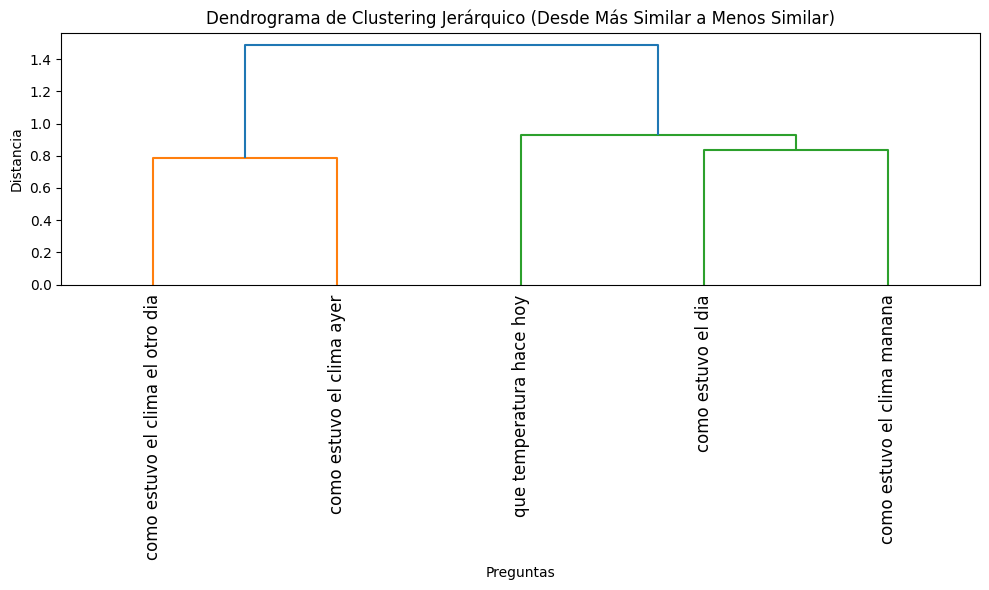

In [35]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Calcular la matriz de distancias
distance_matrix = 1 - df_combinations.pivot(index='question_1', columns='question_2', values='similarity_score').fillna(0)

# Invertir el orden de la matriz de distancias para agrupar desde las más similares
distance_matrix = distance_matrix.iloc[::-1]

# Realizar el clustering aglomerativo
linkage_matrix = linkage(distance_matrix.values, method='complete', metric='euclidean')

# Visualizar el dendrograma
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=distance_matrix.index, leaf_rotation=90)
plt.title('Dendrograma de Clustering Jerárquico (Desde Más Similar a Menos Similar)')
plt.xlabel('Preguntas')
plt.ylabel('Distancia')
plt.tight_layout()
plt.show()


<hr>
Output as json, with amount of similar questions and questions included within

C:\Users\Lorenn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster 0:
2                ¿Cuál es tu estación del año favorita?
3                 ¿Qué ropa prefieres usar en invierno?
4                   ¿Has visto alguna vez un arco iris?
9           ¿Cuál es tu pronóstico del tiempo favorito?
10            ¿Has experimentado alguna vez un tornado?
13               ¿Qué opinas sobre el cambio climático?
18    ¿Cuál es tu opinión sobre los fenómenos meteor...
20    ¿Qué piensas sobre los pronósticos del tiempo ...
21    ¿Cuál es tu temporada de vacaciones preferida ...
23    ¿Qué opinas sobre las estaciones del año en ot...
Name: questions_clean, dtype: object

Cluster 1:
7           ¿Qué actividad disfrutas en un día soleado?
17    ¿Qué tan importante es el clima para ti al pla...
19    ¿Qué actividades evitas hacer cuando el clima ...
Name: questions_clean, dtype: object

Cluster 2:
6                          ¿Te gusta el clima lluvioso?
8             ¿Cómo afecta el clima tu estado de ánimo?
11                   ¿Prefieres el clima frío o cál

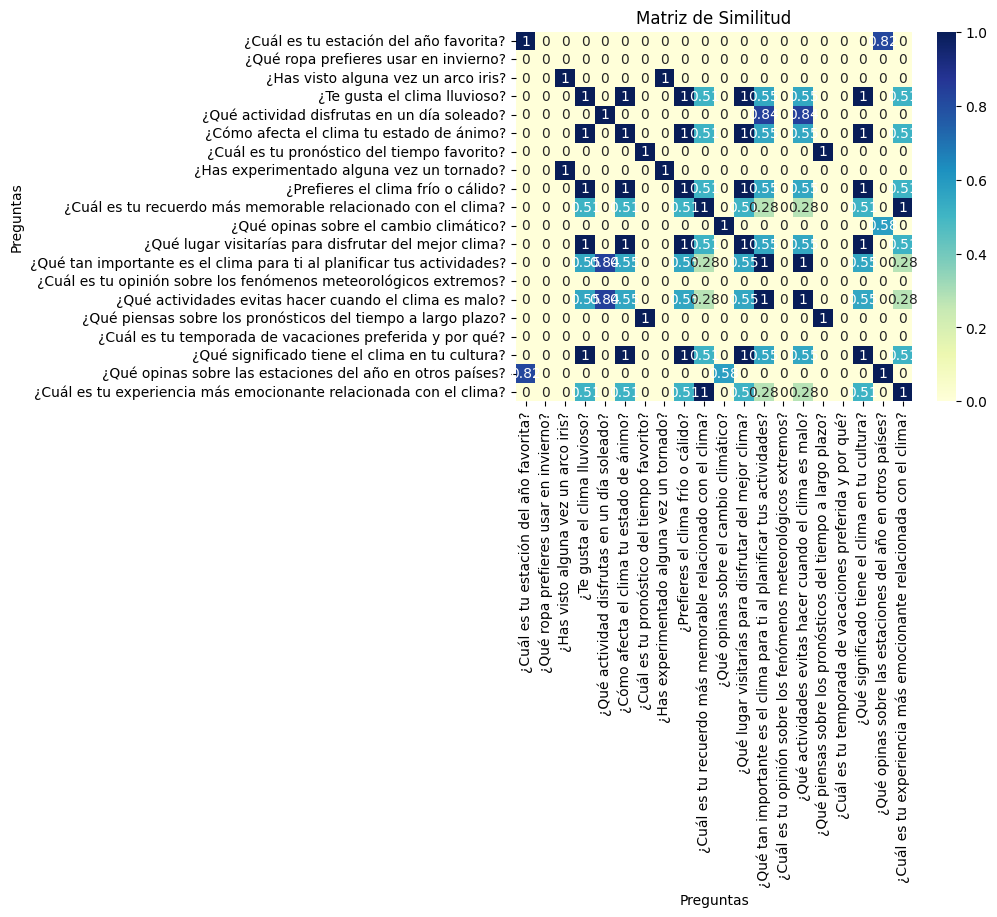

In [40]:
# import pandas as pd
# import numpy as np
# import spacy
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Cargar el modelo de spaCy en español
# nlp = spacy.load("es_core_news_sm")

# # Leer el CSV
# df = pd.read_csv("questions.csv")

# # Aplicar procesamiento de texto utilizando spaCy
# def preprocess_text(text):
#     doc = nlp(text)
#     tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]
#     return " ".join(tokens)

# # Aplicar preprocesamiento de texto a cada pregunta
# df['processed_question'] = df['questions_clean'].apply(preprocess_text)

# # Filtrar oraciones demasiado cortas
# df = df[df['processed_question'].apply(lambda x: len(x.split())) > 2]

# # Utilizar TF-IDF para crear una matriz de características
# vectorizer = TfidfVectorizer(min_df=2)  # Ajusta min_df según sea necesario
# X = vectorizer.fit_transform(df['processed_question'])

# # Aplicar clustering (K-Means)
# num_clusters = 3  # Puedes ajustar este número según tus necesidades
# kmeans = KMeans(n_clusters=num_clusters, random_state=42)
# kmeans.fit(X)

# # Obtener las etiquetas de los clusters
# df['cluster'] = kmeans.labels_

# # Imprimir las oraciones agrupadas por cluster
# for cluster_id in range(num_clusters):
#     print(f"Cluster {cluster_id}:")
#     print(df[df['cluster'] == cluster_id]['questions_clean'])
#     print()

# # Calcular y visualizar la matriz de similitud
# similarity_matrix = X @ X.T
# sns.heatmap(similarity_matrix.toarray(), annot=True, cmap="YlGnBu", xticklabels=df['questions_clean'], yticklabels=df['questions_clean'])
# plt.title("Matriz de Similitud")
# plt.xlabel("Preguntas")
# plt.ylabel("Preguntas")
# plt.show()
